In [1]:
from time import time
from utils import make_batch
from models import WaveNet, Generator
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
%matplotlib inline

In [15]:
Audio('./voice_train.wav')

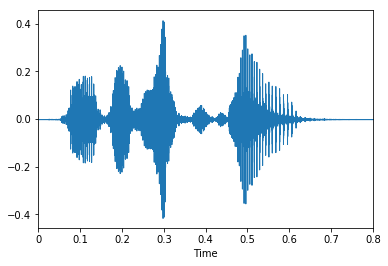

In [20]:
x, sr = librosa.load('./voice_train.wav')
librosa.display.waveplot(x, sr=sr)

In [3]:
Audio('./voice_test_last.wav')

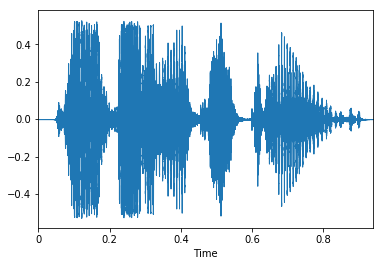

In [21]:
x, sr = librosa.load('./voice_test_last.wav')
librosa.display.waveplot(x, sr=sr)

In [4]:
inputs, targets = make_batch('./voice_test_last.wav')
# output_path = './output.wav'
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1
# sample_rate = 44100
sample_rate = 32000

In [5]:
inputs.shape

(1, 41471, 1)

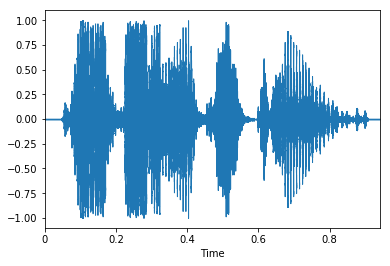

In [11]:
librosa.display.waveplot(inputs[0, :, 0], sr=44100)

In [6]:
model = WaveNet(num_time_samples=num_time_samples, num_channels=num_channels, gpu_fraction=gpu_fraction)

In [7]:
# model = WaveNet(num_time_samples=num_time_samples, num_channels=num_channels, gpu_fraction=gpu_fraction)

# print('inputs.shape = ', inputs.shape)
# Audio(inputs.reshape(inputs.shape[1]), rate=44100)
# print('inputs.shape = ', inputs.shape)
# print('targets.shape = ', targets.shape)

tic = time()
model.test(inputs, targets)
toc = time()
print('Training time = {} seconds'.format(toc-tic))

generator = Generator(model)

input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, sample_rate)
Audio(predictions, rate=44100)


# print('prediction.shape = ', predictions.shape)
# predictions_output = predictions[0, :]
# print('predictions_output.shape=', predictions_output.shape)
# toc = time()
# print('Sampling time = {} seconds'.format(toc-tic))
# print('Completed sampling rate = {}'.format(predictions.shape[1]))

# librosa.output.write_wav(output_path, predictions[0, :], sample_rate)
# wav_out = predictions_output.astype(dtype=np.float16)
# librosa.output.write_wav(output_path, wav_out, 22050)
# print('Output signal saved to {} successfully'.format(output_path))


# from scipy.io import wavfile
# # wav_out = np.asarray(predictions_output)
# wav_out = predictions.astype(dtype=np.int16)

# wavfile.write('./testout.wav', 44100, wav_out)

# librosa.display.waveplot(predictions[0, :], sr=sample_rate)
# plt.show()

# X = librosa.stft(predictions[0, :])
# Xdb = librosa.amplitude_to_db(abs(X))
# librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')

# plt.show()



INFO:tensorflow:Restoring parameters from ./bongsang_model.ckpt
Loading saved model from ./bongsang_model.ckpt
Test loss=250.59487915039062
Training time = 35.267295598983765 seconds
Sampling step #0, signal prediction = -0.4509803921568627
Sampling step #1000, signal prediction = -0.5137254901960784
Sampling step #2000, signal prediction = -0.3176470588235294
Sampling step #3000, signal prediction = -0.2941176470588236
Sampling step #4000, signal prediction = 0.1215686274509804
Sampling step #5000, signal prediction = 0.050980392156862786
Sampling step #6000, signal prediction = -0.0039215686274509665
Sampling step #7000, signal prediction = -0.21568627450980393
Sampling step #8000, signal prediction = -0.10588235294117654
Sampling step #9000, signal prediction = -0.10588235294117654
Sampling step #10000, signal prediction = -0.3176470588235294
Sampling step #11000, signal prediction = -0.09019607843137256
Sampling step #12000, signal prediction = -0.615686274509804
Sampling step #130

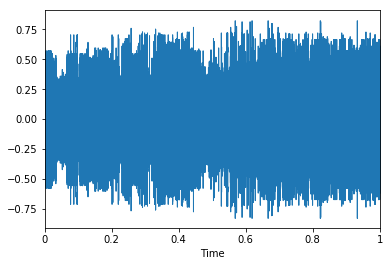

In [10]:
librosa.display.waveplot(predictions[0, :], sr=sample_rate)

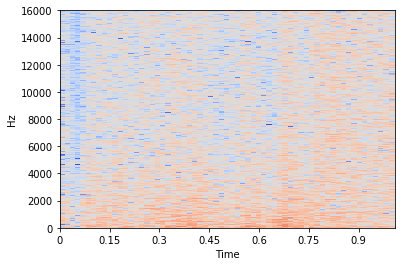

In [9]:
X = librosa.stft(predictions[0, :])
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')